<a href="https://colab.research.google.com/github/yokahealthcare/C-Eyes-App-New/blob/master/%5Bmain%20v1%5D%20Face%20Distance%20Approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Distance Approximation
### Measure The Distance Between Camera and Person Face Ahead

In [15]:
# library
import cv2
from skimage import io
from google.colab.patches import cv2_imshow

# face detector object
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# defining the fonts
fonts = cv2.FONT_HERSHEY_COMPLEX

# colors
GREEN = (0, 255, 0)
RED = (0, 0, 255)
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

## PART 1 : Preparation

### Define Constant
> `known_distance` : distance from camera to object(face) in centimeter
>
> `known_width`    : width of the face in the real world or object plane in centimeter
>
> **data come from** : ref_image.jpg

In [2]:
known_distance = 70
known_width = 15.5

### Define Function to Gather Width of Image from Streaming (in pixel)

In [3]:
def get_width_pixel(image):

    face_width = 0 # making face width to zero

    # converting color image to gray scale image
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detecting face in the image
    faces = face_detector.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

    # looping through the faces detect in the image
    # getting coordinates x, y , width and height
    for (x, y, h, w) in faces:

        # draw the rectangle on the face
        cv2.rectangle(image, (x, y), (x+w, y+h), GREEN, 2)

        # getting face width in the pixels
        face_width = w

    # return the face width in pixel
    return face_width

### Define Necessary Functions
> `get_focal_length()` : getting the focal length
>
> `get_distance()` : getting the distance respect to object

In [4]:
# focal length finder function
def get_focal_length(real_distance, real_width, width_in_rf_image):
    # finding the focal length
    focal_length = (width_in_rf_image * real_distance) / real_width
    return focal_length

# distance estimation function
def get_distance(focal_length, real_width, width_in_rf_image):
    distance = (real_width * focal_length) / width_in_rf_image

    # return the distance
    return distance

### All Go Function

In [20]:
def get_face_distance_approx(ref_image, known_distance, known_width, test_image):
    # load ref_image with cv2.imread()
    # ref_image = cv2.imread(ref_image)

    # get the width of pixel from the image
    ref_face_width_pixel = get_width_pixel(ref_image)

    # calculate the focal length
    focal_length = get_focal_length(known_distance, known_width, ref_face_width_pixel)

    print(f"Focal Length has been Founded \t: {focal_length}\n")



    # load test_image with cv2.imread()
    # test_image = cv2.imread(test_image)

    # get the width of pixel from the image
    test_face_width_pixel = get_width_pixel(test_image)

    if test_face_width_pixel != 0:
        # get distance
        distance = get_distance(focal_length, known_width, test_face_width_pixel)
        print(f"Distance has been Founded \t: {distance}\n")

        # draw line as background of text
        cv2.line(test_image, (30, 30), (230, 30), RED, 32)
        cv2.line(test_image, (30, 30), (230, 30), BLACK, 28)

        # Drawing Text on the screen
        cv2.putText(
            test_image, f"Distance: {round(distance,2)} CM", (30, 35),
        fonts, 0.6, GREEN, 2)

    # show the frame on the screen
    cv2_imshow(test_image)

In [13]:
def url_to_image(url):
  image = io.imread(url)
  # return the image
  return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

Focal Length has been Founded 	: 623.2258064516129

Distance has been Founded 	: 26.321525885558582



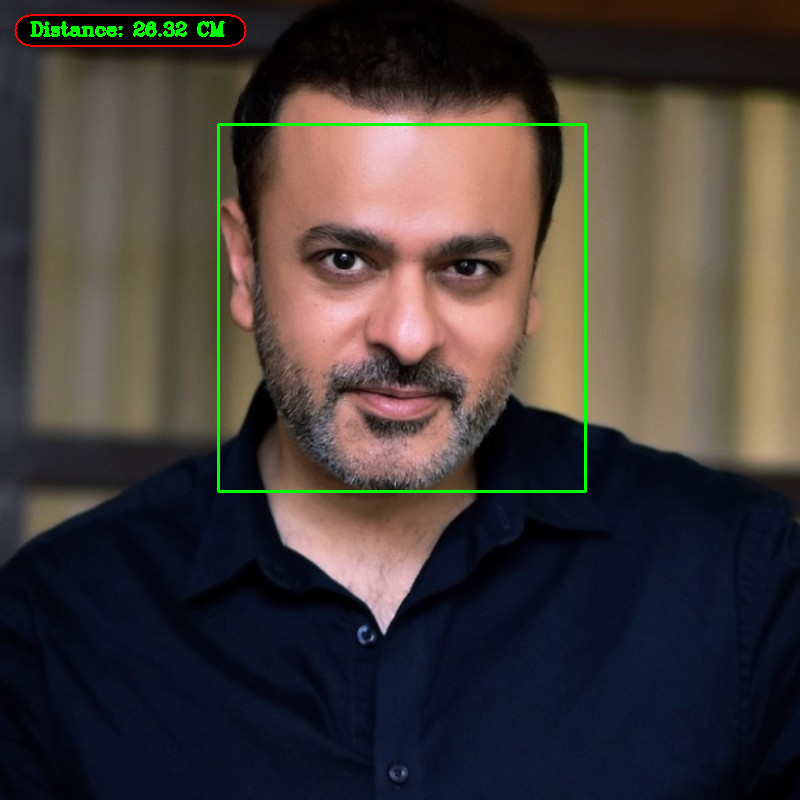

In [21]:
ref_image_url = url_to_image("https://raw.githubusercontent.com/yokahealthcare/C-Eyes-App-New/master/ref_image.jpg")
test_image_url = url_to_image("https://media.licdn.com/dms/image/D4D03AQGXVc7giJyk8A/profile-displayphoto-shrink_800_800/0/1679478863316?e=2147483647&v=beta&t=sVvdWqcrJAzexVRCWOJNYsgJNAb-TrzxHcHOOp0bS0k")
get_face_distance_approx(ref_image_url, known_distance, known_width, test_image_url)

## PART 2 : Deep Learning